# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

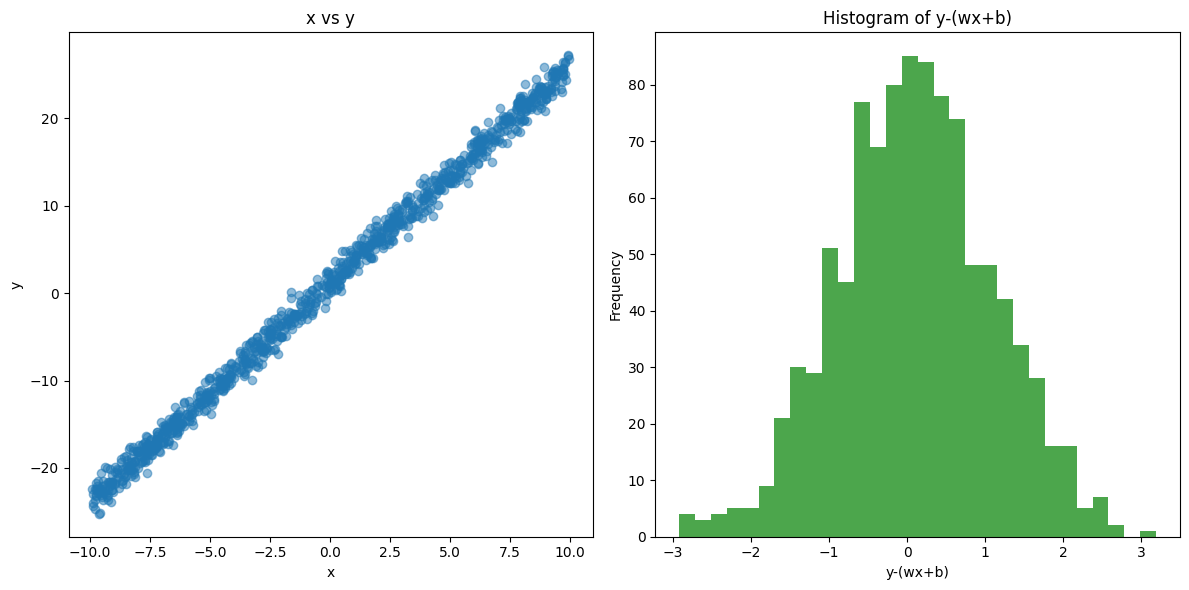

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Set random seed for reproducibility
np.random.seed(42)

#Parameters for linear relationship
w=2.5
b=1.0

#Create 1000 examples of x
x = np.random.uniform(-10, 10, 1000)

#Generate normally distibuted noise
noise = np.random.normal(0, 1, 1000)

#Linear relationship with noise
y = w * x + b + noise

#Calculate y-(wx+b)
y_minus_wx_b = y-(w*x+b)

#Plot x vs y
plt.figure(figsize=(12, 6))

#Scatter plot x vs y
plt.subplot(1,2,1)
plt.scatter(x,y,alpha=0.5)
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')

#Histogram of y-(wx+b)
plt.subplot(1,2,2)
plt.hist(y_minus_wx_b, bins=30, alpha=0.7, color='g')
plt.title('Histogram of y-(wx+b)')
plt.xlabel('y-(wx+b)')
plt.ylabel('Frequency')

#Show the plots
plt.tight_layout()
plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [9]:
# Re-import numpy to resolve the issue
import numpy as np

# Redefine the functions
def model_loop(x, w, b):
    y = []
    for i in range(len(x)):
        y.append(w * x[i] + b)
    return y

def model_np(x, w, b):
    return w * x + b

# Generate test data
x_test = np.random.uniform(-10, 10, 1000)
w_test = 2.5
b_test = 1.0

# Compute y using both methods
y_loop = model_loop(x_test, w_test, b_test)
y_np = model_np(x_test, w_test, b_test)

# Compare outputs to check if they are identical
are_identical = np.allclose(y_loop, y_np)

are_identical

True

3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

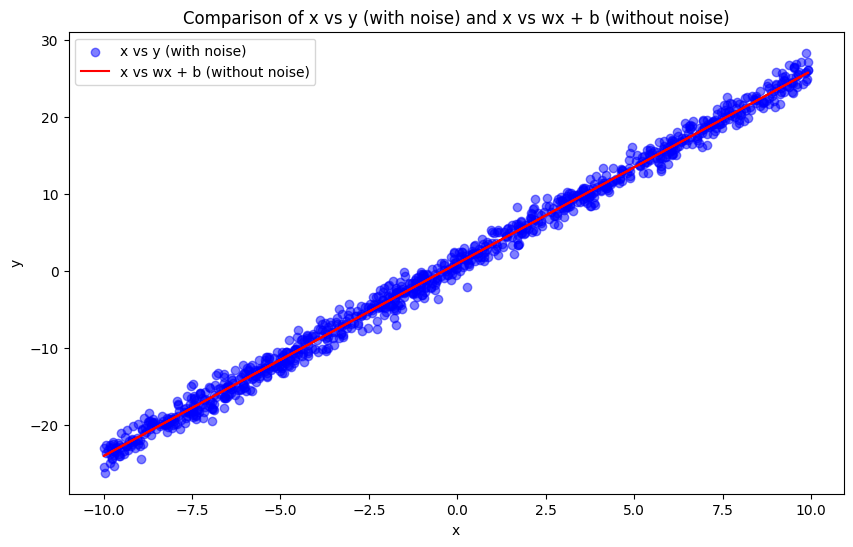

In [8]:
# Redefine the missing variables and execute again
import numpy as np
import matplotlib.pyplot as plt

# Redefine the model_np function
def model_np(x, w, b):
    return w * x + b

# Parameters for linear relationship
w_test = 2.5
b_test = 1.0

# Generate test data
x_test = np.random.uniform(-10, 10, 1000)

# Generate y (noisy version) using explicit loops
y_loop = model_np(x_test, w_test, b_test) + np.random.normal(0, 1, 1000)

# Generate y_pred (non-noisy version)
y_pred = model_np(x_test, w_test, b_test)

# Plot x vs y (from Exercise 1 with noise) and x vs wx + b (without noise)
plt.figure(figsize=(10, 6))

# Plot x vs y (with noise)
plt.scatter(x_test, y_loop, alpha=0.5, label="x vs y (with noise)", color='blue')

# Plot x vs wx + b (without noise)
plt.plot(x_test, y_pred, color='red', label="x vs wx + b (without noise)")

# Add labels and title
plt.title("Comparison of x vs y (with noise) and x vs wx + b (without noise)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


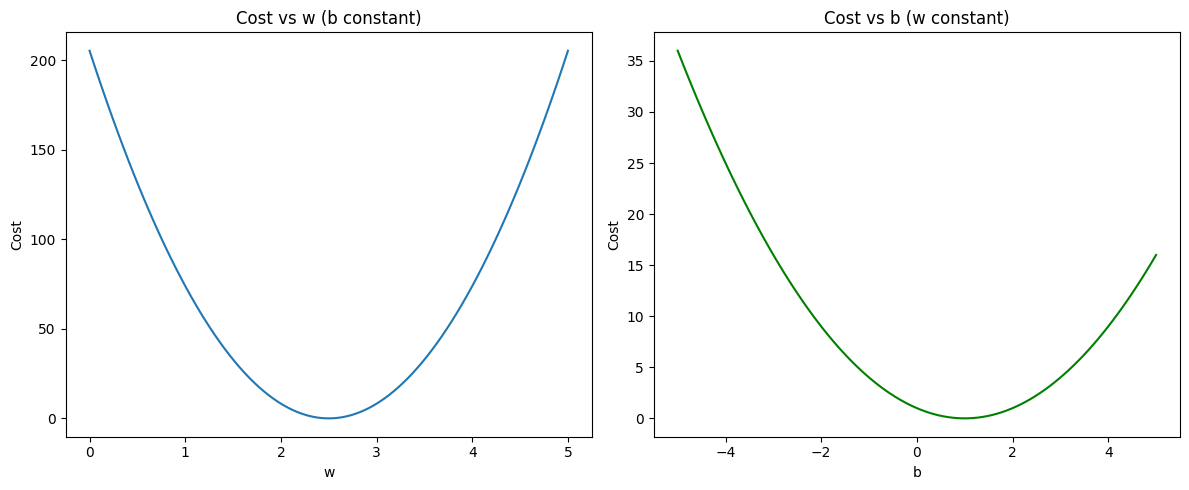

In [7]:
# Define the cost function (Mean Squared Error)
def cost(x, y, w, b):
    y_pred = model_np(x, w, b)
    return np.mean((y - y_pred) ** 2)

# Create a range of w and b values for plotting the cost function
w_values = np.linspace(0, 5, 100)
b_values = np.linspace(-5, 5, 100)

# Calculate the cost for different w values (holding b constant)
b_constant = 1.0
cost_w = [cost(x_test, y_loop, w, b_constant) for w in w_values]

# Calculate the cost for different b values (holding w constant)
w_constant = 2.5
cost_b = [cost(x_test, y_loop, w_constant, b) for b in b_values]

# Plotting the cost vs w
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w_values, cost_w, label='Cost vs w')
plt.title('Cost vs w (b constant)')
plt.xlabel('w')
plt.ylabel('Cost')

# Plotting the cost vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, cost_b, label='Cost vs b', color='green')
plt.title('Cost vs b (w constant)')
plt.xlabel('b')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

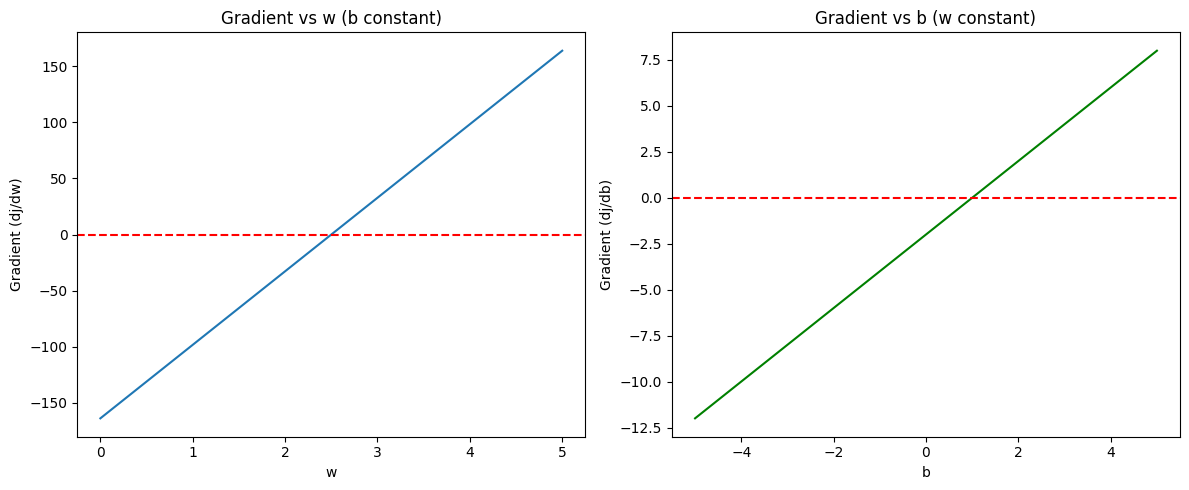

In [10]:
# Define the gradient function
def gradient(x, y, w, b):
    y_pred = model_np(x, w, b)
    m = len(x)  # number of examples
    dj_dw = -(2/m) * np.sum((y - y_pred) * x)
    dj_db = -(2/m) * np.sum(y - y_pred)
    return dj_dw, dj_db

# Calculate gradients for a range of w (holding b constant)
grad_w = [gradient(x_test, y_loop, w, b_constant)[0] for w in w_values]

# Calculate gradients for a range of b (holding w constant)
grad_b = [gradient(x_test, y_loop, w_constant, b)[1] for b in b_values]

# Plotting the gradient vs w (holding b constant)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w_values, grad_w, label='Gradient vs w')
plt.axhline(0, color='red', linestyle='--')  # Indicate where gradient is zero
plt.title('Gradient vs w (b constant)')
plt.xlabel('w')
plt.ylabel('Gradient (dj/dw)')

# Plotting the gradient vs b (holding w constant)
plt.subplot(1, 2, 2)
plt.plot(b_values, grad_b, label='Gradient vs b', color='green')
plt.axhline(0, color='red', linestyle='--')  # Indicate where gradient is zero
plt.title('Gradient vs b (w constant)')
plt.xlabel('b')
plt.ylabel('Gradient (dj/db)')

plt.tight_layout()
plt.show()

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [16]:
import copy
import math

# Define the gradient_descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient):
    w = copy.deepcopy(w_in)
    b = b_in

    J_history = []
    p_history = []

    for i in range(num_iters):
        # Calculate the gradients
        dj_dw, dj_db = gradient(x, y, w, b)

        # Update parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Store the cost and parameters for each iteration
        if i < 100000:
            J_history.append(cost(x, y, w, b))
            p_history.append([w, b])

        # Print updates every 10% of iterations
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}, dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e}, w: {w:0.3f}, b: {b:0.5f}")

    return w, b, J_history, p_history

# Initialize variables
w_initial = 0.0  # initial guess for w
b_initial = 0.0  # initial guess for b
alpha = 0.01     # learning rate
iterations = 1000  # number of iterations

# Run gradient descent
w_final, b_final, J_history, p_history = gradient_descent(x_test, y_loop, w_initial, b_initial, alpha, iterations, cost, gradient)

# Final w, b and cost
w_final, b_final


Iteration    0: Cost 2.54e+01, dj_dw: -1.639e+02, dj_db: -2.589e+00, w: 1.639, b: 0.02589
Iteration  100: Cost 1.66e-02, dj_dw: 9.755e-04, dj_db: -2.629e-01, w: 2.500, b: 0.87112
Iteration  200: Cost 2.93e-04, dj_dw: 1.295e-04, dj_db: -3.490e-02, w: 2.500, b: 0.98289
Iteration  300: Cost 5.15e-06, dj_dw: 1.719e-05, dj_db: -4.632e-03, w: 2.500, b: 0.99773
Iteration  400: Cost 9.08e-08, dj_dw: 2.282e-06, dj_db: -6.148e-04, w: 2.500, b: 0.99970
Iteration  500: Cost 1.60e-09, dj_dw: 3.028e-07, dj_db: -8.161e-05, w: 2.500, b: 0.99996
Iteration  600: Cost 2.82e-11, dj_dw: 4.020e-08, dj_db: -1.083e-05, w: 2.500, b: 0.99999
Iteration  700: Cost 4.97e-13, dj_dw: 5.336e-09, dj_db: -1.438e-06, w: 2.500, b: 1.00000
Iteration  800: Cost 8.75e-15, dj_dw: 7.083e-10, dj_db: -1.909e-07, w: 2.500, b: 1.00000
Iteration  900: Cost 1.54e-16, dj_dw: 9.401e-11, dj_db: -2.534e-08, w: 2.500, b: 1.00000


(2.5000000000062426, 0.9999999983177316)

7. Plot the cost and parameters versus iteration of gradient descent.

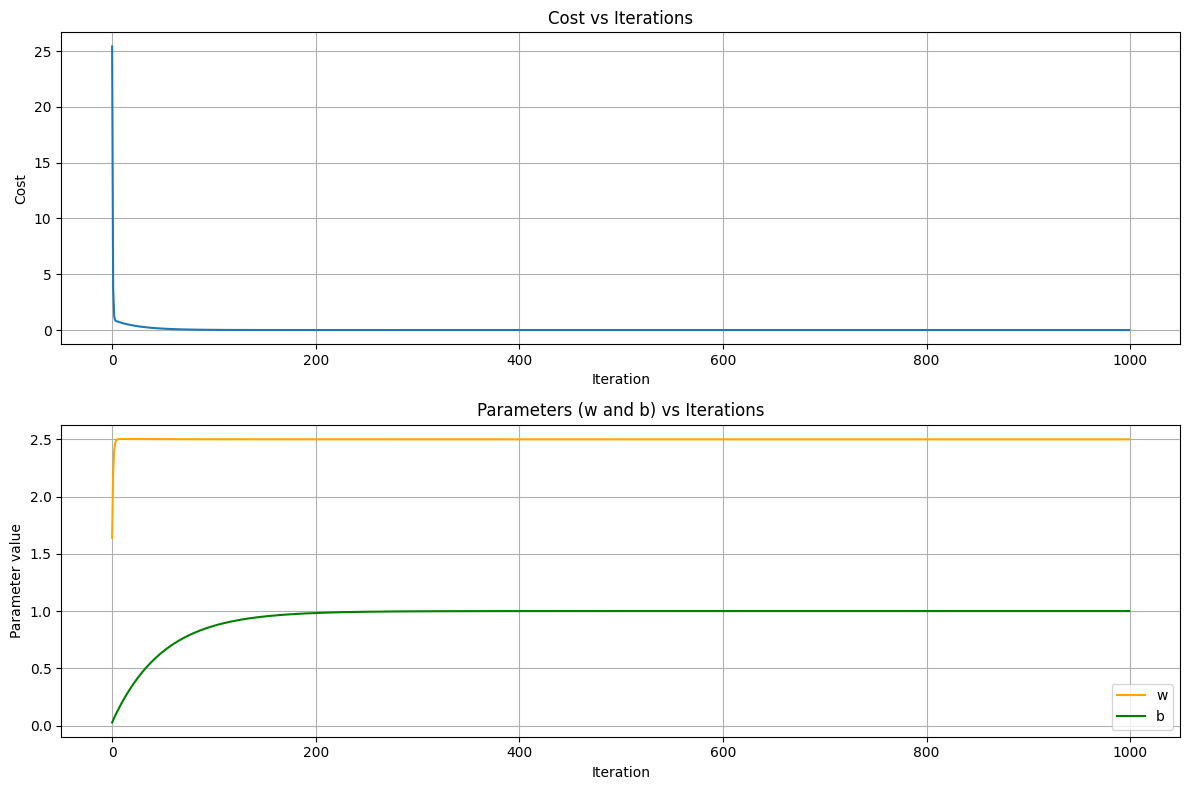

In [17]:
# Extracting values for plotting
iterations = list(range(len(J_history)))
w_values = [p[0] for p in p_history]
b_values = [p[1] for p in p_history]

# Plotting cost vs iterations
plt.figure(figsize=(12, 8))

# Plot Cost vs Iterations
plt.subplot(2, 1, 1)
plt.plot(iterations, J_history, label="Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.grid(True)

# Plot w and b vs Iterations
plt.subplot(2, 1, 2)
plt.plot(iterations, w_values, label="w", color="orange")
plt.plot(iterations, b_values, label="b", color="green")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.title("Parameters (w and b) vs Iterations")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()